###Differential Evoluation
The Differential Evoluation Technique is a method for assessing the performance or value of different entities, processes, or systems by comparing them to a set of predefined criteria or benchmarks. This technique is based on genetic algorithms, which are optimization methods inspired by natural selection. In genetic algorithms, a group of possible solutions evolves over several iterations (generations) to find the best or nearly best solution to a problem.

#####Load necessary library

In [1]:
from scipy.optimize import differential_evolution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Load experimental data

In [2]:
## Experimental data has been collected from the reference paper([L. Andreozzi et al. / Construction and Building Materials 65 (2014) 1–13]).
o_data = pd.read_csv('./sample_data/Data_076.csv')
o_data.head()

,omega,Gp,Gdp
0,2.003440e-08,0.07210,0.00603
1,3.566130e-08,0.06703,0.01921
2,6.330880e-08,0.07548,0.02940
3,1.125930e-07,0.08393,0.02597
4,2.003440e-07,0.09181,0.03030


##### Convert experimental data into necessary format or unit.

In [3]:
O_Omega=(o_data['omega'].to_numpy()*0.1591549)
O_Gp=(o_data['Gp'].to_numpy()*10**6)
O_Gdp=(o_data['Gdp'].to_numpy()*10**6)

##### Assign data into new variable

In [4]:
x_data=O_Omega
y1_data=O_Gp
y2_data=O_Gdp

##### Plot Storage molulus versus frequency to see the nature of experimental data.

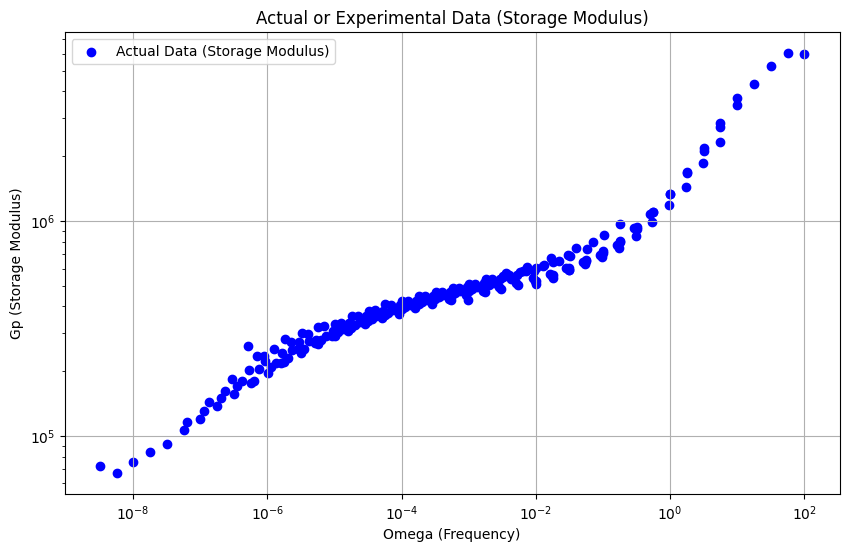

In [5]:
# plot storage modulus
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y1_data, label="Actual Data (Storage Modulus)", color="blue")
plt.xlabel("Omega (Frequency)")
plt.ylabel("Gp (Storage Modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Actual or Experimental Data (Storage Modulus)")
plt.grid(True)
plt.savefig('./sample_data/Gp_076_Raw.png')
plt.show()

##### Plot Loss molulus versus frequency to see the nature of experimental data.

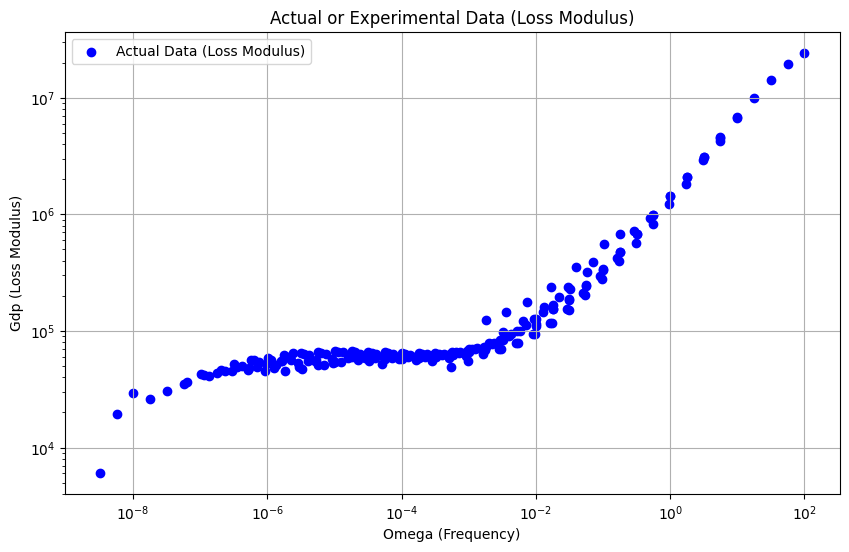

In [6]:
# plot Loss Modulus
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y2_data, label="Actual Data (Loss Modulus)", color="blue")
plt.xlabel("Omega (Frequency)")
plt.ylabel("Gdp (Loss Modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Actual or Experimental Data (Loss Modulus)")
plt.grid(True)
plt.savefig('./sample_data/Gp_076_Raw.png')
plt.show()

##### Set the boundary value (upper limit and lower limit) of required coefficients of Maxwell series.

In [7]:
lower_bound_g1=100000
lower_bound_g2=100000
lower_bound_g3=10000
lower_bound_g4=10000
lower_bound_g5=10000
lower_bound_g6=10000
lower_bound_g7=10000
lower_bound_g8=1000
lower_bound_g9=1000
lower_bound_g10=1000
lower_bound_g11=1000
lower_bound_g12=100


lower_bound_t1=0.001
lower_bound_t2=0.01
lower_bound_t3=0.1
lower_bound_t4=1.0
lower_bound_t5=10
lower_bound_t6=100
lower_bound_t7=1000
lower_bound_t8=10000
lower_bound_t9=10000
lower_bound_t10=10000
lower_bound_t11=10000
lower_bound_t12=100000


#--------------------
upper_bound_g1=1000000000
upper_bound_g2=100000000
upper_bound_g3=100000000
upper_bound_g4=10000000
upper_bound_g5=10000000
upper_bound_g6=10000000
upper_bound_g7=10000000
upper_bound_g8=1000000
upper_bound_g9=1000000
upper_bound_g10=1000000
upper_bound_g11=1000000
upper_bound_g12=100000



upper_bound_t1=1.0
upper_bound_t2=10.0
upper_bound_t3=100
upper_bound_t4=1000
upper_bound_t5=10000
upper_bound_t6=100000
upper_bound_t7=1000000
upper_bound_t8=10000000
upper_bound_t9=10000000
upper_bound_t10=10000000
upper_bound_t11=100000000
upper_bound_t12=1000000000

##### Set the upper limit and lower limit into the parameter of Differential Evoluation techniques.

In [8]:
# Define the bounds for the parameters
bounds = [(lower_bound_g1, upper_bound_g1),
          (lower_bound_g2, upper_bound_g2),
          (lower_bound_g3, upper_bound_g3),
          (lower_bound_g4, upper_bound_g4),
          (lower_bound_g5, upper_bound_g5),
          (lower_bound_g6, upper_bound_g6),
          (lower_bound_g7, upper_bound_g7),
          (lower_bound_g8, upper_bound_g8),
          (lower_bound_g9, upper_bound_g9),
          (lower_bound_g10, upper_bound_g10),
          (lower_bound_g11, upper_bound_g11),
          (lower_bound_g12, upper_bound_g12),

          (lower_bound_t1, upper_bound_t1),
          (lower_bound_t2, upper_bound_t2),
          (lower_bound_t3, upper_bound_t3),
          (lower_bound_t4, upper_bound_t4),
          (lower_bound_t5, upper_bound_t5),
          (lower_bound_t6, upper_bound_t6),
          (lower_bound_t7, upper_bound_t7),
          (lower_bound_t8, upper_bound_t8),
          (lower_bound_t9, upper_bound_t9),
          (lower_bound_t10, upper_bound_t10),
          (lower_bound_t11, upper_bound_t11),
          (lower_bound_t12, upper_bound_t12)]

##### Define the first equation of Objective function

In [9]:
# Define the objective function
def equation1(params,x_data):
    g1, g2, g3,g4,g5,g6,g7,g8,g9,g10,g11,g12, t1, t2, t3, t4, t5, t6, t7, t8,t9,t10,t11,t12 = params
    y1_calculated = (g1 * (((x_data**2 * t1**2) / (1 + x_data**2 * t1**2)))) + \
                   (g2 * (((x_data**2 * t2**2) / (1 + x_data**2 * t2**2)))) + \
                   (g3 * (((x_data**2 * t3**2) / (1 + x_data**2 * t3**2)))) + \
                   (g4 * (((x_data**2 * t4**2) / (1 + x_data**2 * t4**2)))) + \
                   (g5 * (((x_data**2 * t5**2) / (1 + x_data**2 * t5**2)))) + \
                   (g6 * (((x_data**2 * t6**2) / (1 + x_data**2 * t6**2)))) + \
                   (g7 * (((x_data**2 * t7**2) / (1 + x_data**2 * t7**2)))) + \
                   (g8 * (((x_data**2 * t8**2) / (1 + x_data**2 * t8**2)))) + \
                   (g9 * (((x_data**2 * t9**2) / (1 + x_data**2 * t9**2)))) + \
                   (g10 * (((x_data**2 * t10**2) / (1 + x_data**2 * t10**2)))) + \
                   (g11 * (((x_data**2 * t11**2) / (1 + x_data**2 * t11**2)))) + \
                   (g12 * (((x_data**2 * t12**2) / (1 + x_data**2 * t12**2))))
    return y1_calculated

##### Define the second equation of objective function

In [10]:
# Define the objective function
def equation2(params,x_data):
    g1, g2, g3,g4,g5,g6,g7,g8,g9,g10,g11,g12, t1, t2, t3, t4, t5, t6, t7, t8,t9,t10,t11,t12 = params
    y2_calculated = (g1 * (((x_data * t1) / (1 + x_data**2 * t1**2)))) + \
                   (g2 * (((x_data * t2) / (1 + x_data**2 * t2**2)))) + \
                   (g3 * (((x_data * t3) / (1 + x_data**2 * t3**2)))) + \
                   (g4 * (((x_data * t4) / (1 + x_data**2 * t4**2)))) + \
                   (g5 * (((x_data * t5) / (1 + x_data**2 * t5**2)))) + \
                   (g6 * (((x_data * t6) / (1 + x_data**2 * t6**2)))) + \
                   (g7 * (((x_data * t7) / (1 + x_data**2 * t7**2)))) + \
                   (g8 * (((x_data * t8) / (1 + x_data**2 * t8**2)))) + \
                   (g9 * (((x_data * t9) / (1 + x_data**2 * t9**2)))) + \
                   (g10 * (((x_data * t10) / (1 + x_data**2 * t10**2)))) + \
                   (g11 * (((x_data * t11) / (1 + x_data**2 * t11**2)))) + \
                   (g12 * (((x_data * t12) / (1 + x_data**2 * t12**2))))
    return y2_calculated

##### Define the objective or loss function

In [11]:
# Objective function to minimize (sum of squares of differences)
def objective_function(params,x_data, y1_data, y2_data):
    y1_predicted = equation1(params,x_data)
    y2_predicted = equation2(params,x_data)
    error1 = y1_predicted - y1_data
    error2 = y2_predicted - y2_data
    error=(error1**2)+(error2**2)
    return np.sum(error)

##### Define the callback function to connect the objective function

In [12]:
# Callback function to collect objective function values, parameter values, and bounds at each iteration
def callback(xk, convergence):
    current_error = objective_function(xk, x_data, y1_data, y2_data)
    parameter_values.append(xk)
    error_history.append(current_error)

##### Define some variable for the Differential Evolution technique

In [13]:
# Perform differential evolution optimization with callback
error_history = []
parameter_values = []

##### Apply Differential Evolution method with necessary parameters to mimimize the loss function

In [14]:
result = differential_evolution(objective_function, bounds, args=(x_data, y1_data, y2_data), maxiter=20000, popsize=20, strategy='best1exp', callback=callback)

##### Convert the results into an array

In [15]:
# Extract the optimized coefficients and bounds at each iteration
optimized_coefficients = np.array(parameter_values)

##### Print all the values of coefficients

In [16]:
bounds_values = np.array(result.x)
print(optimized_coefficients)

[[7.53442818e+06 1.51914618e+07 2.75192301e+07 ... 9.88872671e+06
  5.81967265e+07 4.10902976e+08]
 [7.53442818e+06 1.51914618e+07 2.75192301e+07 ... 9.88872671e+06
  5.81967265e+07 4.10902976e+08]
 [3.48487396e+08 2.64417244e+07 1.05568466e+07 ... 3.83578650e+06
  1.82642928e+07 1.44698957e+08]
 ...
 [2.72317503e+08 4.81539359e+06 1.12289131e+06 ... 4.22886037e+05
  8.85549553e+07 9.80438406e+08]
 [2.72317503e+08 4.81539359e+06 1.12289131e+06 ... 4.22886037e+05
  8.85549553e+07 9.80438406e+08]
 [2.72317503e+08 4.81539359e+06 1.12289131e+06 ... 4.22886037e+05
  8.85549553e+07 9.80438406e+08]]


##### Draw the Error versus Iteration Curve

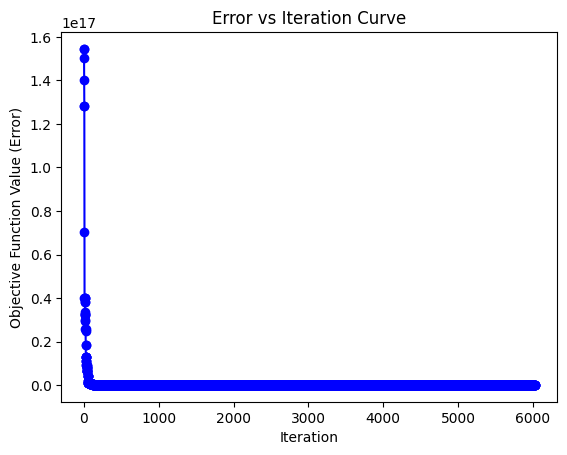

In [17]:
# Plot the error vs iteration curve
plt.plot(error_history, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Error)')
plt.title('Error vs Iteration Curve')
plt.show()

##### Draw optimized coefficients versus iteration

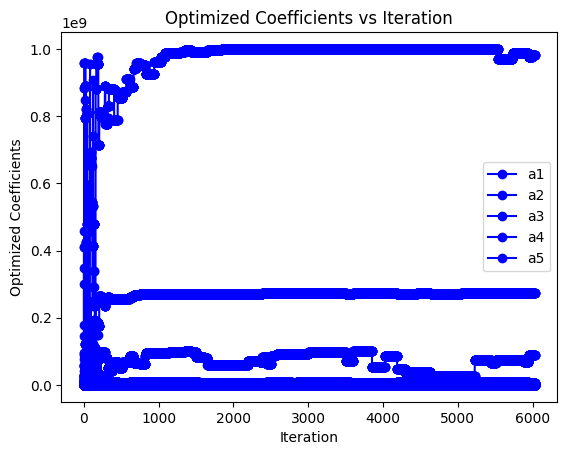

In [18]:
# Plot the optimized coefficients vs iteration
plt.plot(optimized_coefficients, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Optimized Coefficients')
plt.legend(['a1', 'a2', 'a3', 'a4', 'a5'])
plt.title('Optimized Coefficients vs Iteration')
plt.show()

##### Draw the boundary values versus Iteration

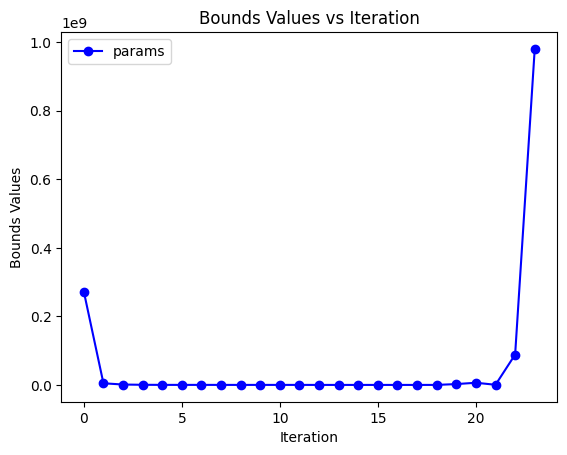

In [19]:
# Plot the bounds vs iteration
plt.plot(bounds_values, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Bounds Values')
plt.legend(['params'])
plt.title('Bounds Values vs Iteration')
plt.show()

##### Write the best value of the coefficients

In [20]:
print(result.x)
best_v=result.x

[2.72317503e+08 4.81539359e+06 1.12289131e+06 3.83018928e+05
 1.23244124e+05 9.07928518e+04 1.12578540e+05 6.14569504e+04
 4.18086014e+04 6.66695532e+04 6.28143498e+04 5.82566447e+04
 1.00000000e-03 6.60090994e-02 2.93856820e-01 3.88284053e+00
 7.57479936e+01 1.73157205e+03 3.46952836e+04 2.46601354e+06
 6.34004548e+06 4.22886037e+05 8.85549553e+07 9.80438406e+08]


##### Assign the variable for the best values

In [21]:
og1=best_v[0]
og2=best_v[1]
og3=best_v[2]
og4=best_v[3]
og5=best_v[4]
og6=best_v[5]
og7=best_v[6]
og8=best_v[7]
og9=best_v[8]
og10=best_v[9]
og11=best_v[10]
og12=best_v[11]

#=======================
#=========================
ot1=best_v[12]
ot2=best_v[13]
ot3=best_v[14]
ot4=best_v[15]
ot5=best_v[16]
ot6=best_v[17]
ot7=best_v[18]
ot8=best_v[19]
ot9=best_v[20]
ot10=best_v[21]
ot11=best_v[22]
ot12=best_v[23]

##### Calculate the storage modulus using the best values

In [22]:
Gp_calc = (og1 * (((x_data**2 * ot1**2) / (1 + x_data**2 * ot1**2)))) + \
                   (og2 * (((x_data**2 * ot2**2) / (1 + x_data**2 * ot2**2)))) + \
                   (og3 * (((x_data**2 * ot3**2) / (1 + x_data**2 * ot3**2)))) + \
                   (og4 * (((x_data**2 * ot4**2) / (1 + x_data**2 * ot4**2)))) + \
                   (og5 * (((x_data**2 * ot5**2) / (1 + x_data**2 * ot5**2)))) + \
                   (og6 * (((x_data**2 * ot6**2) / (1 + x_data**2 * ot6**2)))) + \
                   (og7 * (((x_data**2 * ot7**2) / (1 + x_data**2 * ot7**2)))) + \
                   (og8 * (((x_data**2 * ot8**2) / (1 + x_data**2 * ot8**2)))) + \
                   (og9 * (((x_data**2 * ot9**2) / (1 + x_data**2 * ot9**2)))) + \
                   (og10 * (((x_data**2 * ot10**2) / (1 + x_data**2 * ot10**2)))) + \
                   (og11 * (((x_data**2 * ot11**2) / (1 + x_data**2 * ot11**2)))) + \
                   (og12 * (((x_data**2 * ot12**2) / (1 + x_data**2 * ot12**2))))

##### Calculate the loss modulus for rhe best values

In [23]:
Gdp_calc = (og1 * (((x_data * ot1) / (1 + x_data**2 * ot1**2)))) + \
                   (og2 * (((x_data * ot2) / (1 + x_data**2 * ot2**2)))) + \
                   (og3 * (((x_data * ot3) / (1 + x_data**2 * ot3**2)))) + \
                   (og4 * (((x_data * ot4) / (1 + x_data**2 * ot4**2)))) + \
                   (og5 * (((x_data * ot5) / (1 + x_data**2 * ot5**2)))) + \
                   (og6 * (((x_data * ot6) / (1 + x_data**2 * ot6**2)))) + \
                   (og7 * (((x_data * ot7) / (1 + x_data**2 * ot7**2)))) + \
                   (og8 * (((x_data * ot8) / (1 + x_data**2 * ot8**2)))) + \
                   (og9 * (((x_data * ot9) / (1 + x_data**2 * ot9**2)))) + \
                   (og10 * (((x_data * ot10) / (1 + x_data**2 * ot10**2)))) + \
                   (og11 * (((x_data * ot11) / (1 + x_data**2 * ot11**2)))) + \
                   (og12 * (((x_data * ot12) / (1 + x_data**2 * ot12**2))))

##### Coefficients determined by conventional techniques (Reference paper)

In [24]:
pg1=514628
pg2=280116
pg3=144282
pg4=86904
pg5=76190
pg6=92202
pg7=98780
pg8=85555
pg9=70251
pg10=107653
#----------
pt1=9.51E-2
pt2=4.71E-1
pt3=2.72E+0
pt4=2.11E+1
pt5=2.21E+2
pt6=2.12E+3
pt7=1.74E+4
pt8=1.31E+5
pt9=1.05E+6
pt10=2.99E+7

##### Caluclated storage modulus from conventional techniques (reference paper)

In [25]:
Gp_prev = (pg1 * (((x_data**2 * pt1**2) / (1 + x_data**2 * pt1**2)))) + \
                   (pg2 * (((x_data**2 * pt2**2) / (1 + x_data**2 * pt2**2)))) + \
                   (pg3 * (((x_data**2 * pt3**2) / (1 + x_data**2 * pt3**2)))) + \
                   (pg4 * (((x_data**2 * pt4**2) / (1 + x_data**2 * pt4**2)))) + \
                   (pg5 * (((x_data**2 * pt5**2) / (1 + x_data**2 * pt5**2)))) + \
                   (pg6 * (((x_data**2 * pt6**2) / (1 + x_data**2 * pt6**2)))) + \
                   (pg7 * (((x_data**2 * pt7**2) / (1 + x_data**2 * pt7**2)))) + \
                   (pg8 * (((x_data**2 * pt8**2) / (1 + x_data**2 * pt8**2)))) + \
                   (pg9 * (((x_data**2 * pt9**2) / (1 + x_data**2 * pt9**2)))) + \
                   (pg10 * (((x_data**2 * pt10**2) / (1 + x_data**2 * pt10**2))))

##### Calculated loss modulus from conventional technique (Reference paper)

In [26]:
Gdp_prev = (pg1 * (((x_data * pt1) / (1 + x_data**2 * pt1**2)))) + \
                   (pg2 * (((x_data * pt2) / (1 + x_data**2 * pt2**2)))) + \
                   (pg3 * (((x_data * pt3) / (1 + x_data**2 * pt3**2)))) + \
                   (pg4 * (((x_data * pt4) / (1 + x_data**2 * pt4**2)))) + \
                   (pg5 * (((x_data * pt5) / (1 + x_data**2 * pt5**2)))) + \
                   (pg6 * (((x_data * pt6) / (1 + x_data**2 * pt6**2)))) + \
                   (pg7 * (((x_data * pt7) / (1 + x_data**2 * pt7**2)))) + \
                   (pg8 * (((x_data * pt8) / (1 + x_data**2 * pt8**2)))) + \
                   (og9 * (((x_data * pt9) / (1 + x_data**2 * pt9**2)))) + \
                   (pg10 * (((x_data * pt10) / (1 + x_data**2 * pt10**2))))

##### Plot storage modulus using actual data and data-driven calculated data

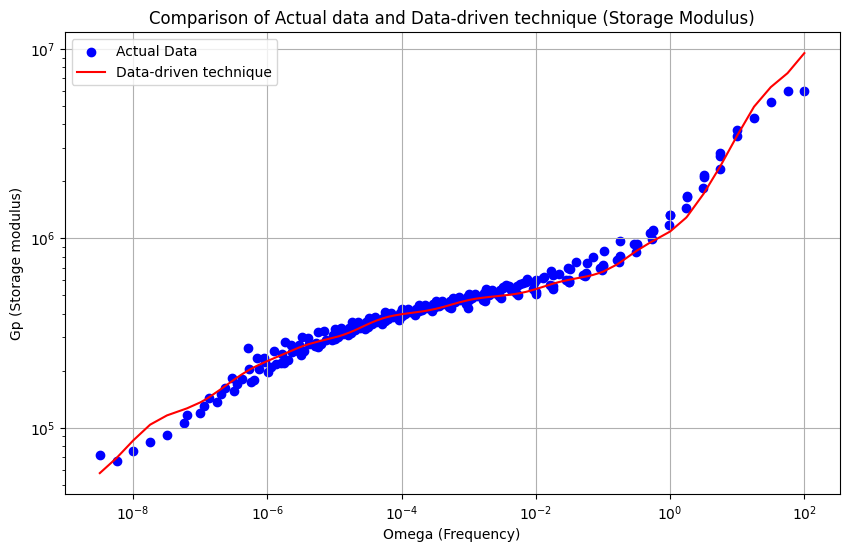

In [28]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y1_data, label="Actual Data", color="blue")
#plt.scatter(x_data, Gp_calc, label="Calculated Data", color="red")
plt.plot(x_data, Gp_calc, label="Data-driven technique", color="red")
plt.xlabel("Omega (Frequency)")
plt.ylabel("Gp (Storage modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Comparison of Actual data and Data-driven technique (Storage Modulus)")
plt.grid(True)
plt.savefig('./sample_data/Gp_076_Raw.png')
plt.show()

##### Plot Storage modulus using actual data, data-driven technique and conventional technique

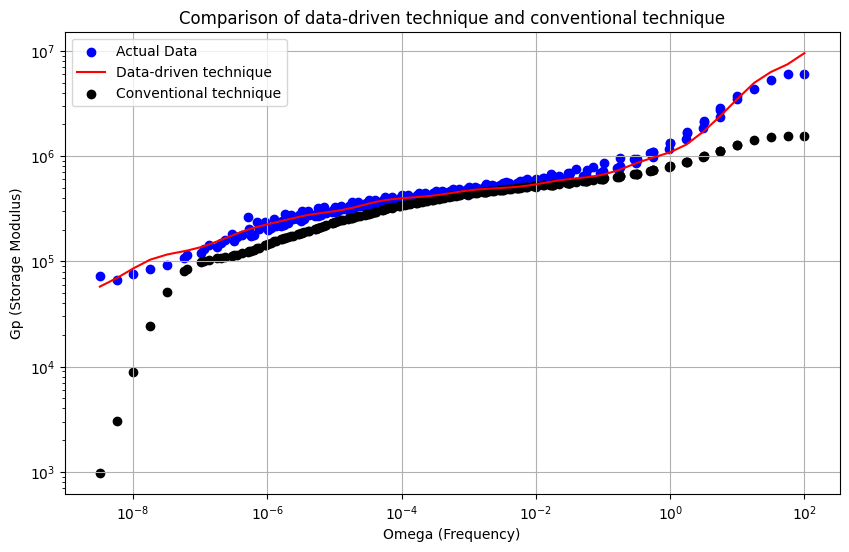

In [29]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y1_data, label="Actual Data", color="blue")
plt.plot(x_data, Gp_calc, label="Data-driven technique", color="red")
plt.scatter(x_data, Gp_prev, label="Conventional technique", color="black")
plt.xlabel("Omega (Frequency)")
plt.ylabel("Gp (Storage Modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Comparison of data-driven technique and conventional technique (Storage Modulus)")
plt.grid(True)
plt.savefig('./sample_data/Com_Gp_076_Raw.png')
plt.show()

##### Plot Storage modulus using actual data, data-driven technique and conventional technique

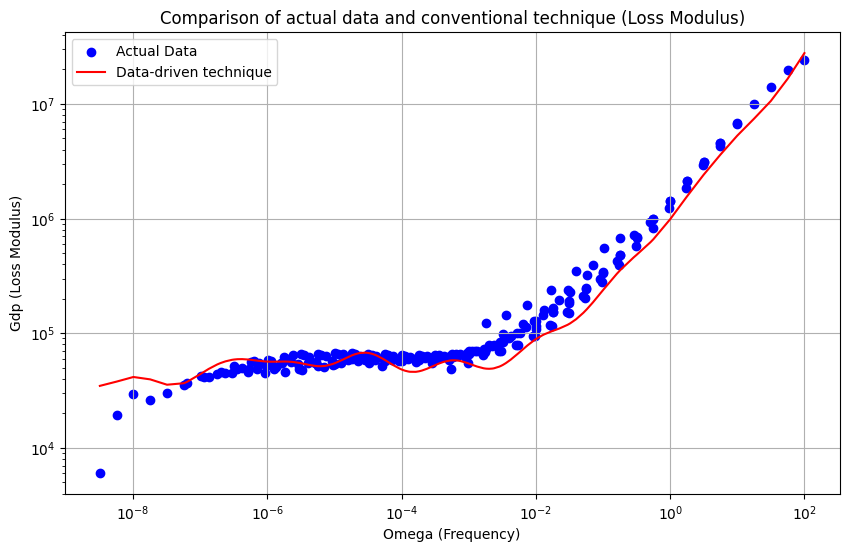

In [30]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y2_data, label="Actual Data", color="blue")
plt.plot(x_data, Gdp_calc, label="Data-driven technique", color="red")
#plt.scatter(O_Omega, O_Gdp, label="Original Data", color="black")
plt.xlabel("Omega (Frequency)")
plt.ylabel("Gdp (Loss Modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Comparison of actual data and conventional technique (Loss Modulus)")
plt.grid(True)
plt.savefig('./sample_data/Gdp_076_Raw.png')
plt.show()

##### Plot Storage modulus using actual data, data-driven technique and conventional technique

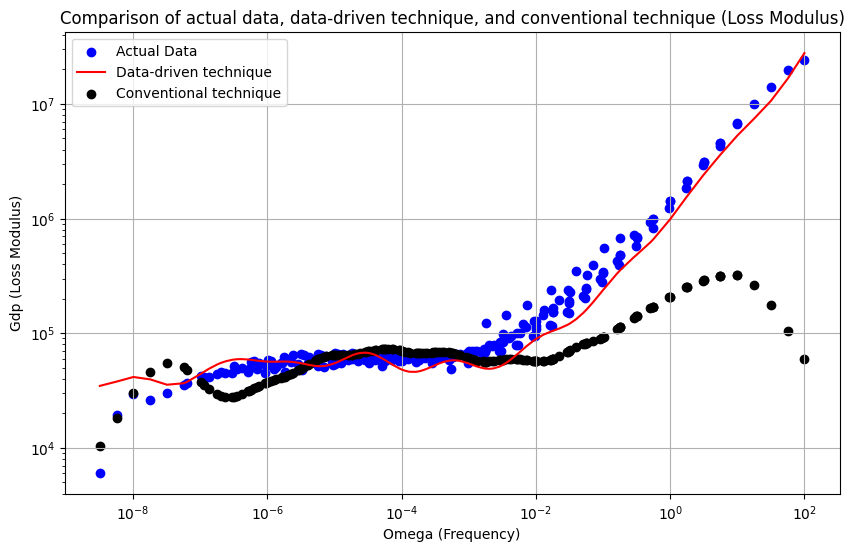

In [31]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y2_data, label="Actual Data", color="blue")
plt.plot(x_data, Gdp_calc, label="Data-driven technique", color="red")
plt.scatter(x_data, Gdp_prev, label="Conventional technique", color="black")
plt.xlabel("Omega (Frequency)")
plt.ylabel("Gdp (Loss Modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Comparison of actual data, data-driven technique, and conventional technique (Loss Modulus)")
plt.grid(True)
plt.savefig('./sample_data/Com_Gdp_076_Raw.png')
plt.show()

##### Calculate shear modulus using the coefficients calculated from data-driven technique

In [32]:
t_data=1/x_data
Gt=og1*np.exp(-t_data/ot1)+\
   og2*np.exp(-t_data/ot2)+\
   og3*np.exp(-t_data/ot3)+\
   og4*np.exp(-t_data/ot4)+\
   og5*np.exp(-t_data/ot5)+\
   og6*np.exp(-t_data/ot6)+\
   og7*np.exp(-t_data/ot7)+\
   og8*np.exp(-t_data/ot8)+\
   og9*np.exp(-t_data/ot9)+\
   og10*np.exp(-t_data/ot10)+\
   og11*np.exp(-t_data/ot11)+\
   og12*np.exp(-t_data/ot12)

##### Calculate shear modulus using the coefficients calculated from conventional technique

In [33]:
Gt_P=pg1*np.exp(-t_data/pt1)+\
   pg2*np.exp(-t_data/pt2)+\
   pg3*np.exp(-t_data/pt3)+\
   pg4*np.exp(-t_data/pt4)+\
   pg5*np.exp(-t_data/pt5)+\
   pg6*np.exp(-t_data/pt6)+\
   pg7*np.exp(-t_data/pt7)+\
   pg8*np.exp(-t_data/pt8)+\
   pg9*np.exp(-t_data/pt9)+\
   pg10*np.exp(-t_data/pt10)

Plot shear modulus calculated from data-driven technique

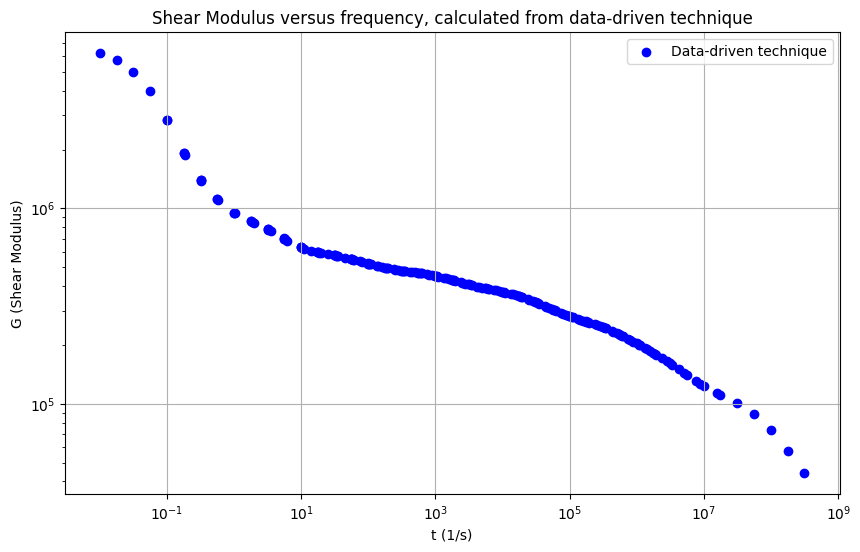

In [34]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(t_data, Gt, label="Data-driven technique", color="blue")
#plt.plot(x_data, Gdp_calculated, label="Calculated Data", color="red")
plt.xlabel("t (1/s)")
plt.ylabel("G (Shear Modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Shear Modulus versus frequency, calculated from data-driven technique")
plt.grid(True)
plt.savefig('./sample_data/Gt_076_Raw.png')
plt.show()

##### Comparison of data-driven and conventional technique in the calculation of shear modulus

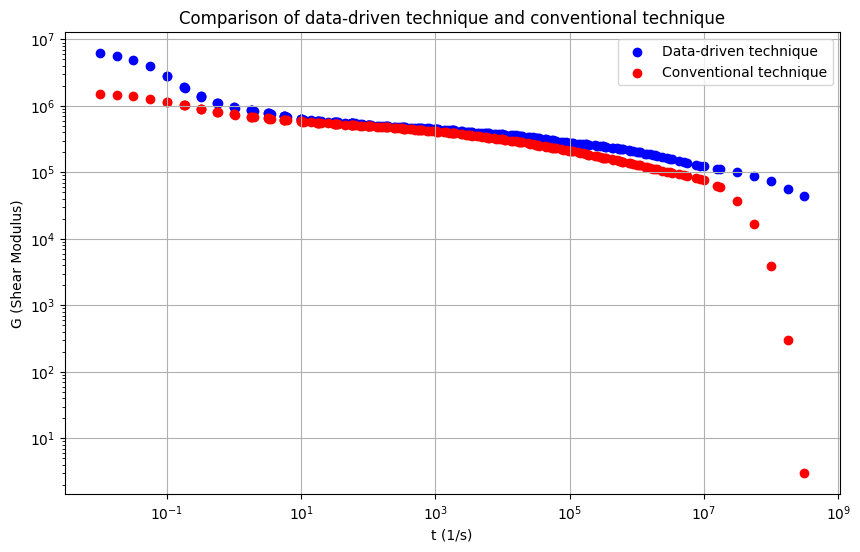

In [35]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(t_data, Gt, label="Data-driven technique", color="blue")
plt.scatter(t_data, Gt_P, label="Conventional technique", color="red")
plt.xlabel("t (1/s)")
plt.ylabel("G (Shear Modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Comparison of data-driven technique and conventional technique")
plt.grid(True)
plt.savefig('./sample_data/Com_Gt_076_Raw.png')
plt.show()

##### Store some necessary data into files

In [ ]:
df1 = pd.DataFrame(best_v)
df1.to_csv('./sample_data/F200_best12_076_Raw.csv',index=False)
print('File created')

File created


In [ ]:
df2 = pd.DataFrame(optimized_coefficients)
df2.to_csv('./sample_data/F200_coef12_076_Raw.csv',index=False)
print('File created')

File created


In [ ]:
df3 = pd.DataFrame(error_history)
df3.to_csv('./sample_data/F200_his12_076_Raw.csv',index=False)
print('File created')

File created


In [ ]:
print(np.log10(error_history[len(error_history)-1]))

13.838272269868765


**Conclusion:** Differential evolution has been used to analyze the experimental data and to find the properties of visco-elastic materials. It is clear that differential evolution technique provide good results than the conventional technique. This data-driven techniques also reduce the complexity of calculation and provide a simple way to calculate the properties of visco-elastic material.